In [3]:
#@title MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/RESEARCH/2022_SPDlearning_MiniCourse')
print(os.getcwd())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/RESEARCH/2022_SPDlearning_MiniCourse


In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

Suppose we have an image of $W\times H$. That is, an image with $m = W\cdot H$ pixels. 


In [12]:
img = plt.imread("imgs/granadilla.jpg")

print(f"Tipo: {type(img)}")
print(f"Dimensión: {img.shape}")

Tipo: <class 'numpy.ndarray'>
Dimensión: (600, 600, 3)


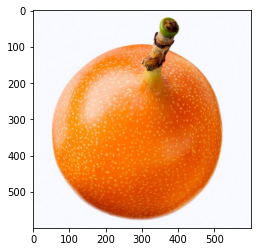

In [13]:
plt.imshow(img)
plt.show()

We can use features to construct covariance descriptors. For example:

$[R(x,y), G(x,y), B(x,y), |\frac{\partial R}{\partial x}|, |\frac{\partial R}{\partial y}|, |\frac{\partial G}{\partial x}|, |\frac{\partial G}{\partial Y}|, |\frac{\partial B}{\partial x}|, |\frac{\partial B}{\partial Y}|]$

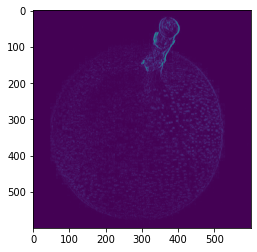

In [43]:
plt.imshow(np.abs(cv2.Sobel(feature_r,cv2.CV_64F,1,0,ksize=3)))

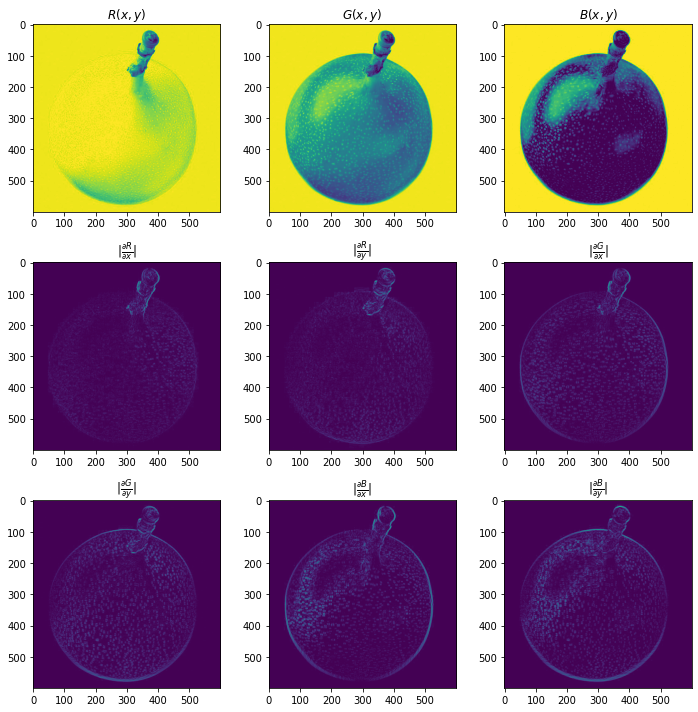

In [51]:
from IPython.core.pylabtools import figsize
feature_r = img[:,:,0]
feature_g = img[:,:,1]
feature_b = img[:,:,2]

dx_r = np.abs(cv2.Sobel(feature_r,cv2.CV_64F,1,0,ksize=3))
dy_r = np.abs(cv2.Sobel(feature_r,cv2.CV_64F,0,1,ksize=3))

dx_g = np.abs(cv2.Sobel(feature_g,cv2.CV_64F,1,0,ksize=3))
dy_g = np.abs(cv2.Sobel(feature_g,cv2.CV_64F,0,1,ksize=3))

dx_b = np.abs(cv2.Sobel(feature_b,cv2.CV_64F,1,0,ksize=3))
dy_b = np.abs(cv2.Sobel(feature_b,cv2.CV_64F,0,1,ksize=3))

fig, axs = plt.subplots(3,3, figsize = (10,10))
axs[0,0].imshow(feature_r)
axs[0,0].set_title(r"$R(x,y)$")

axs[0,1].imshow(feature_g)
axs[0,1].set_title(r"$G(x,y)$")

axs[0,2].imshow(feature_b)
axs[0,2].set_title(r"$B(x,y)$")

axs[1,0].imshow(dx_r)
axs[1,0].set_title(r"$|\frac{\partial R}{\partial x}|$")

axs[1,1].imshow(dy_r)
axs[1,1].set_title(r"$|\frac{\partial R}{\partial y}|$")

axs[1,2].imshow(dx_g)
axs[1,2].set_title(r"$|\frac{\partial G}{\partial x}|$")

axs[2,0].imshow(dy_g)
axs[2,0].set_title(r"$|\frac{\partial G}{\partial y}|$")

axs[2,1].imshow(dx_b)
axs[2,1].set_title(r"$|\frac{\partial B}{\partial x}|$")

axs[2,2].imshow(dy_b)
axs[2,2].set_title(r"$|\frac{\partial B}{\partial y}|$")

plt.tight_layout()
plt.show()

In [55]:
features = np.array([feature_r,
                     feature_g,
                     feature_b,
                     dx_r,
                     dy_r,
                     dx_g,
                     dy_g,
                     dx_b,
                     dy_b])

features_flatten = features.reshape(9,-1)

print(f"Features shape: {features.shape}")
print(f"Features flattened shape: {features_flatten.shape}")

Features shape: (9, 600, 600)
Features flattened shape: (9, 360000)


* Covariance descriptors encode linear correlations (**second-order statistics**) between all the
different extracted features.

* Covariance descriptors allow the flexibility in using multiple, different features and the
ability to **fuse** them together. 

* The image representation by covariance matrices is **compact**.

* Covariance descriptors are robust to noise.

SyntaxError: ignored

In [ ]:
cov_matrix = np.cov(features_flatten)
cov_matrix
# cov_matrix.shape

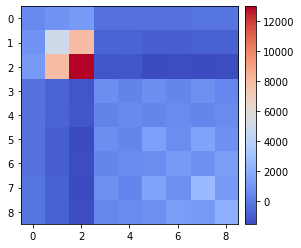

In [63]:

ax = plt.gca()

im = plt.imshow(cov_matrix, cmap = "coolwarm")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

plt.colorbar(im, cax=cax)
plt.show()